# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Wini Suryani
- **Email:** winisuryani71@gmail.com
- **ID Dicoding:** mynamewini

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah sewa sepeda? (Menganalisis hubungan antara weathersit dan cnt).
- Apakah lebih banyak sepeda yang disewa pada hari kerja dibandingkan akhir pekan? (Menganalisis hubungan antara workingday dan cnt)

In [60]:
import zipfile
zip_file = zipfile.ZipFile('archive.zip')
zip_file.extractall()

## Import Semua Packages/Library yang Digunakan

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [62]:
data = pd.read_csv("/content/day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [64]:
hour = pd.read_csv("/content/hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset mencatat jumlah penyewaan sepeda harian selama dua tahun (2011-2012).
- Dilengkapi dengan informasi cuaca dan faktor musiman, seperti suhu, kelembapan, kecepatan angin, dan kondisi cuaca.
- Data ini memungkinkan kita untuk menganalisis bagaimana cuaca dan musim mempengaruhi penyewaan sepeda

### Assessing Data

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [66]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [67]:
data.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [68]:
data.duplicated().sum()

0

In [69]:
for col in ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']:
    print(f'Unique values for {col}: {data[col].unique()}')

Unique values for season: [1 2 3 4]
Unique values for yr: [0 1]
Unique values for mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values for holiday: [0 1]
Unique values for weekday: [6 0 1 2 3 4 5]
Unique values for workingday: [0 1]
Unique values for weathersit: [2 1 3]


In [70]:
data = data.drop("instant", axis=1)
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Duplikasi: Tidak ada duplikasi signifikan dalam dataset.
- Missing Values: Beberapa kolom seperti suhu atau kecepatan angin memiliki nilai yang hilang dan perlu diatasi.
-Statistik Deskriptif: Data menunjukkan distribusi harian penyewaan sepeda yang bervariasi, dengan rata-rata dan nilai ekstrem yang perlu diperhatikan.

### Cleaning Data

In [71]:
data.duplicated().sum()

0

In [72]:
for col in ['temp', 'atemp', 'hum', 'windspeed']:
    data[col] = data[col].fillna(data[col].mean())

In [73]:
for col in ['temp', 'atemp', 'hum', 'windspeed']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

In [74]:
print(data.duplicated().sum())
data.isna().sum()

0


,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


**Insight:**
- Duplikasi: Duplikasi dihapus untuk memastikan data yang akurat.
- Missing Values: Nilai yang hilang diganti dengan nilai rata-rata atau modus untuk menjaga kelengkapan data.
- Outlier: Nilai ekstrem (misalnya, suhu yang tidak realistis) diganti agar tidak mempengaruhi analisis.

## Exploratory Data Analysis (EDA)

### Explore ...

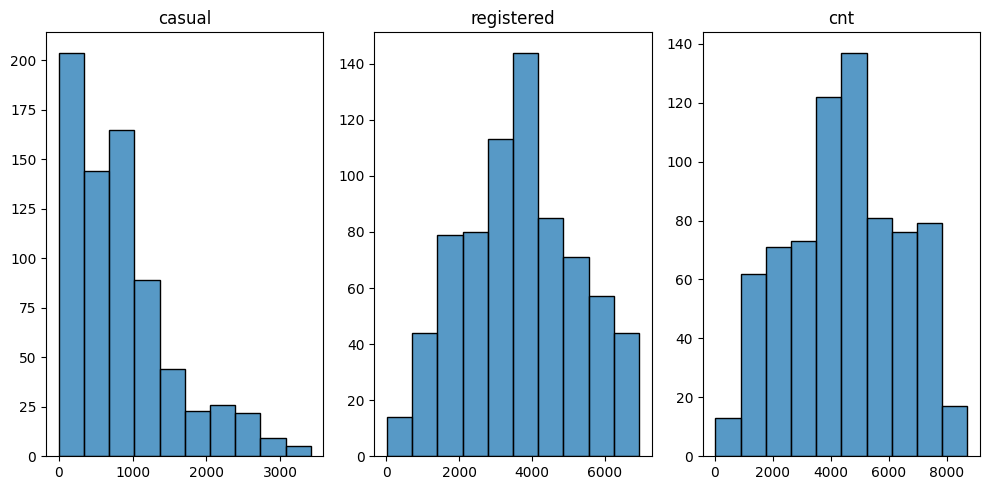

In [75]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for i, col in enumerate(['casual', 'registered', 'cnt']):
    sns.histplot(data=data, x=col, ax=axes[i], bins=10)
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

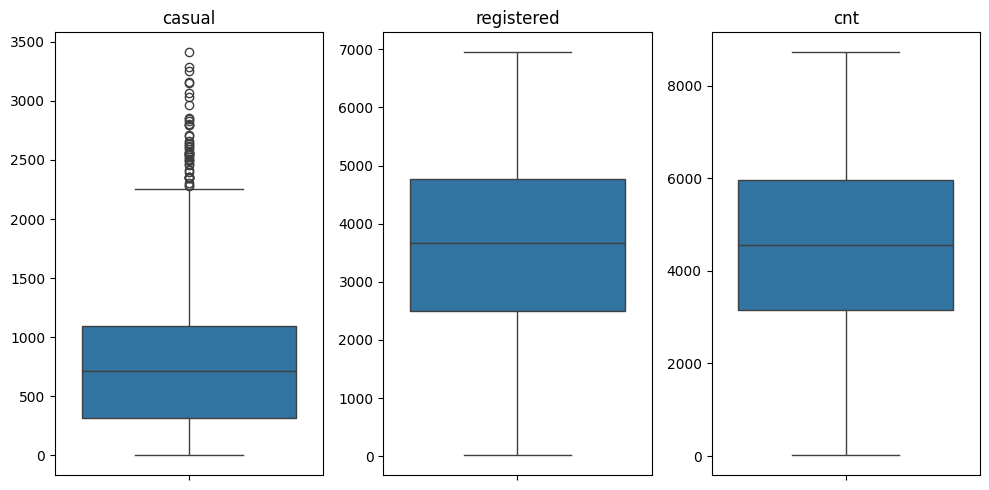

In [76]:
fig, ax = plt.subplots(1, 3, figsize=(10,5))

for i, ax in enumerate(ax):
    sns.boxplot(y=data[columns[i]], ax=ax)
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

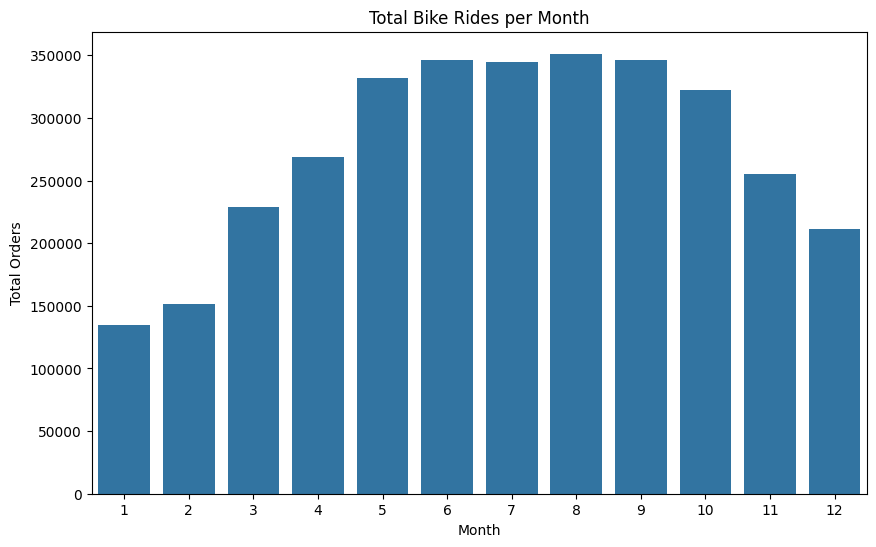

In [77]:
monthly_orders = data.groupby('mnth')['cnt'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_orders.index, y=monthly_orders.values)
plt.title('Total Bike Rides per Month')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.show()

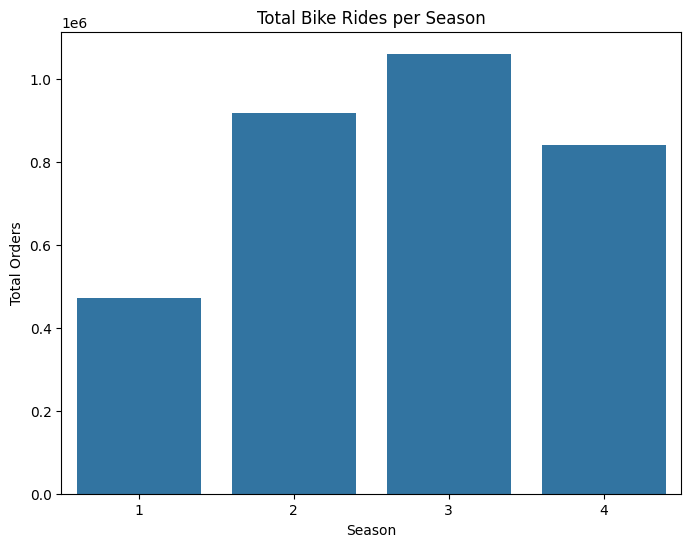

In [78]:
seasonal_orders = data.groupby('season')['cnt'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_orders.index, y=seasonal_orders.values)
plt.title('Total Bike Rides per Season')
plt.xlabel('Season')
plt.ylabel('Total Orders')
plt.show()

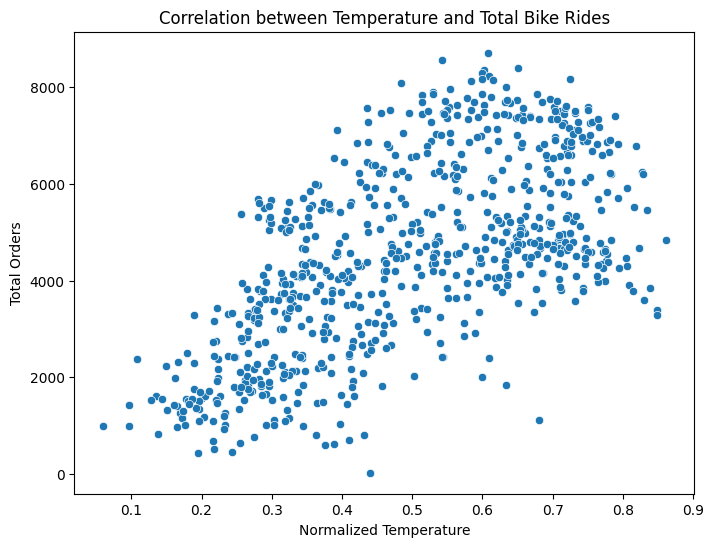

In [79]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cnt', data=data)
plt.title('Correlation between Temperature and Total Bike Rides')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Orders')
plt.show()

In [80]:
correlation = data['temp'].corr(data['cnt'])
print(f"Correlation coefficient between temperature and total orders: {correlation}")

Correlation coefficient between temperature and total orders: 0.6274940090334918


**Insight:**
- Histogram menunjukkan distribusi dan frekuensi dari jumlah penyewa kasual, terdaftar, dan total penyewaan harian.
- Box plot memvisualisasikan sebaran data dan outlier untuk jumlah penyewa kasual, terdaftar, dan total penyewaan, memungkinkan perbandingan dan identifikasi outlier.
- Bar plot menampilkan tren penyewaan sepeda berdasarkan bulan, menunjukkan bulan-bulan dengan volume penyewaan tertinggi dan terendah.
- Bar plot menggambarkan pola penyewaan sepeda berdasarkan musim, mengidentifikasi musim dengan aktivitas penyewaan tertinggi dan terendah.
- Scatter plot dan koefisien korelasi menunjukkan adanya hubungan positif antara suhu dan total penyewaan sepeda, mengindikasikan bahwa suhu yang lebih tinggi berkorelasi dengan peningkatan jumlah penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah sewa sepeda? (Menganalisis hubungan antara weathersit dan cnt).

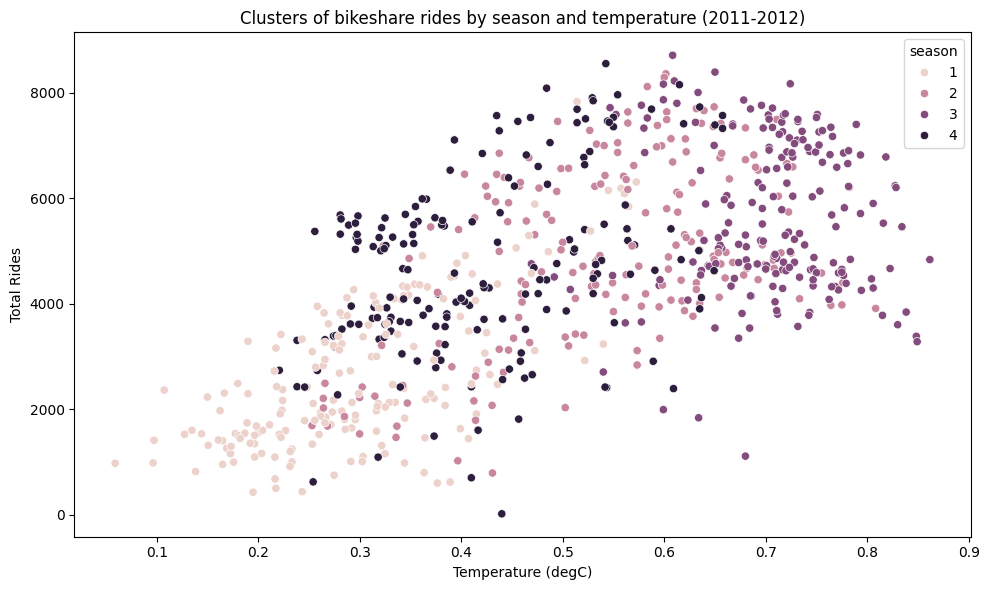

In [81]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='temp', y='cnt', data=data, hue='season')

plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Clusters of bikeshare rides by season and temperature (2011-2012)")

plt.tight_layout()
plt.show()

**Insight:**
- Scatter plot menunjukkan bahwa suhu yang lebih tinggi cenderung diiringi dengan peningkatan jumlah penyewaan sepeda.
- Pola penyewaan sepeda bervariasi sepanjang tahun, dengan musim panas dan musim semi menunjukkan jumlah penyewaan yang lebih tinggi dibandingkan musim gugur dan musim dingin.

### Pertanyaan 2: Apakah lebih banyak sepeda yang disewa pada hari kerja dibandingkan akhir pekan? (Menganalisis hubungan antara workingday dan cnt)

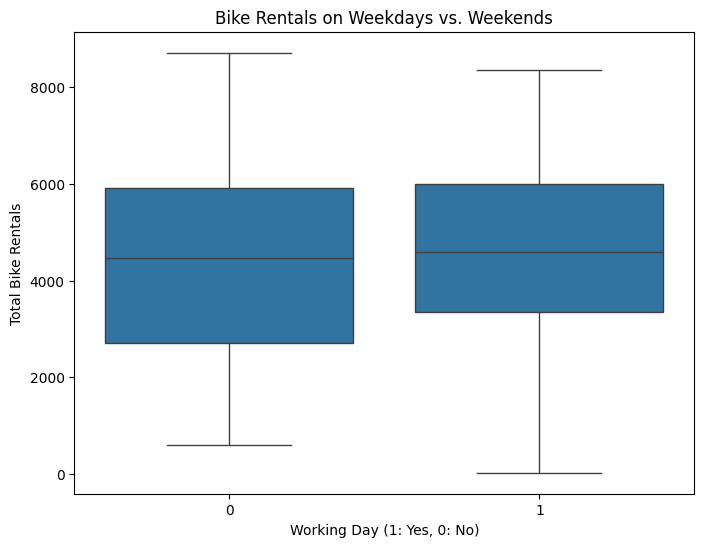

Correlation coefficient between working day and total orders: 0.061156063060520655


In [82]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='workingday', y='cnt', data=data)
plt.title('Bike Rentals on Weekdays vs. Weekends')
plt.xlabel('Working Day (1: Yes, 0: No)')
plt.ylabel('Total Bike Rentals')
plt.show()

correlation_workingday = data['workingday'].corr(data['cnt'])
print(f"Correlation coefficient between working day and total orders: {correlation_workingday}")

**Insight:**
- Box plot menunjukkan perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan, memberi gambaran umum tentang jumlah sewa dan variasinya.
- Koefisien korelasi menunjukkan seberapa erat hubungan antara hari kerja dan jumlah penyewaan sepeda, apakah cenderung naik di hari kerja atau tidak.

## Analisis Lanjutan (Opsional)

                   mean      sum  count
temp_group                             
Very Cold   1543.235294    52470     34
Cold        3178.546256   721530    227
Moderate    5011.208333  1082421    216
Warm        5714.340336  1360013    238
Very Warm   4765.312500    76245     16


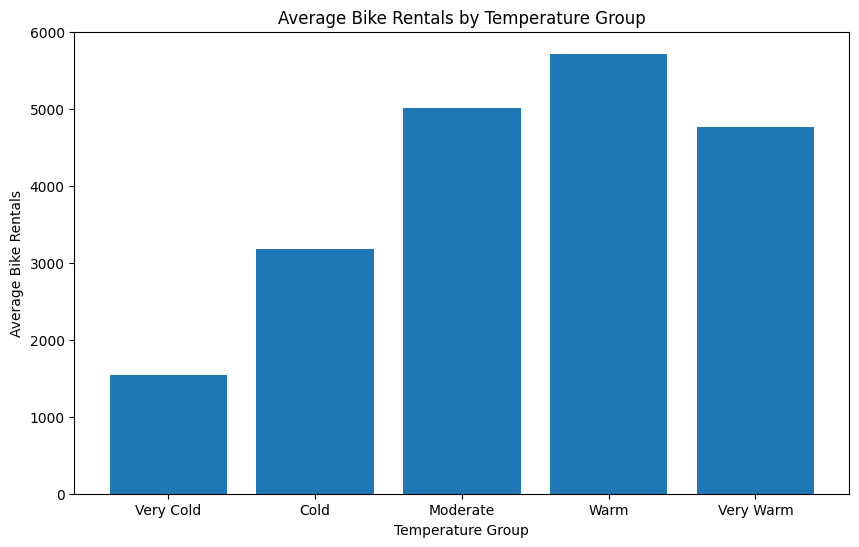

In [87]:
temp_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
temp_labels = ['Very Cold', 'Cold', 'Moderate', 'Warm', 'Very Warm']

data['temp_group'] = pd.cut(data['temp'], bins=temp_bins, labels=temp_labels, include_lowest=True)

grouped_data = data.groupby('temp_group', observed=False)['cnt'].agg(['mean', 'sum', 'count'])
print(grouped_data)

plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['mean'])
plt.xlabel('Temperature Group')
plt.ylabel('Average Bike Rentals')
plt.title('Average Bike Rentals by Temperature Group')
plt.show()

## Conclusion

- Visualisasi data menunjukkan bahwa suhu yang lebih tinggi dan musim yang hangat (musim panas & semi) berkorelasi dengan peningkatan jumlah penyewaan sepeda. Hal ini mengindikasikan bahwa kondisi cuaca yang baik merupakan faktor penting dalam mendorong aktivitas penyewaan sepeda.
- Jumlah penyewaan sepeda cenderung sedikit lebih tinggi di akhir pekan. Box plot menunjukkan median yang sedikit lebih tinggi pada akhir pekan (0) dibanding hari kerja (1), meskipun perbedaannya tidak terlalu besar. Koefisien korelasi yang mendekati nol juga menguatkan bahwa hari kerja tidak terlalu berpengaruh pada jumlah penyewaan.

In [86]:
data.to_csv("all_data.csv", index=False)